# YOLO
<h2><i>Install Packages</i></h2>
<h4>conda install pytorch torchvision torchaudio cpuonly -c pytorch -y</h4>
<h4>conda install -c conda-forge ultralytics -y</h4>

In [1]:
import torch
import uuid # unique identifier
import os
import time
import numpy as np
import cv2
from ultralytics import YOLO
from matplotlib import pyplot as plt

In [ ]:
# Run detection on an online image
# results = model.predict(source="https://ultralytics.com/images/zidane.jpg", show=True)

In [2]:
# load model
model = YOLO("yolov8n.pt")

In [3]:
model

YOLO(
  (model): DetectionModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(16, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (2): C2f(
        (cv1): Conv(
          (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(48, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_s

In [ ]:
img = "https://ultralytics.com/images/zidane.jpg"
cars = "https://cdn.standardmedia.co.ke/images/tuesday/evingu8un5xyhs855d493f6df4084.jpg"
floods = "floods.jpeg"

In [ ]:
results = model(floods)[0]
results.verbose()

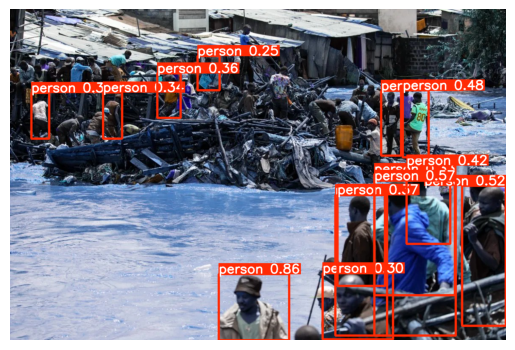

In [6]:
annotated_img = results.plot()
plt.imshow(annotated_img)
plt.axis("off")
plt.show()

In [8]:
# results = model.predict(source="https://ultralytics.com/images/zidane.jpg", show=True)
results = model.predict(floods, show=True)


image 1/1 /Users/briankimanzi/Documents/programmingLanguages/PythonProgramming/ObjectDetection/floods.jpeg: 448x640 14 persons, 295.9ms
Speed: 38.1ms preprocess, 295.9ms inference, 7.5ms postprocess per image at shape (1, 3, 448, 640)


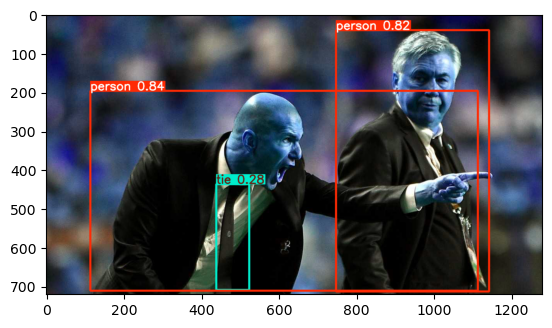

In [22]:
plt.imshow(np.squeeze(results.plot()))

In [ ]:
# real time detection
# cap = cv2.VideoCapture("Traffic.mp4", cv2.CAP_AVFOUNDATION)

# cap = cv2.VideoCapture(0, cv2.CAP_AVFOUNDATION)
# while cap.isOpened():
#     ret, frame = cap.read()

#     # make detection
#     results = model(frame)

#     annotated_frame = results[0].plot()
#     frame_resized = cv2.resize(annotated_frame, (960, 540))  # (width, height)
#     cv2.imshow("YOLO", frame_resized)

#     if cv2.waitKey(10) & 0xFF == ord("q"):
#         break
# cap.release()
# cv2.destroyAllWindows()

In [ ]:
# Train from Scratch

In [3]:
IMAGES_PATH = os.path.join("data", "images")
labels = ["awake", "drowsy"]
number_imgs = 20

if not os.path.exists(IMAGES_PATH):
    if os.name =='posix':
        os.makedirs(IMAGES_PATH, exist_ok=True)
    if os.name == 'nt':
        os.makedirs(IMAGES_PATH, exist_ok=True)
for label in labels:
    path = os.path.join(IMAGES_PATH, label)
    if not os.path.exists(path):
        os.makedirs (path, exist_ok=True)

In [4]:
# cap = cv2.VideoCapture(0, cv2.CAP_AVFOUNDATION)
# for label in labels:
#     print("Collecting images for {}".format(label))
#     time.sleep(10)

#     for img_num in range(number_imgs):
#         print("Collecting images for {}, image number {}".format(label, img_num))

#         ret, frame = cap.read()
        
#         # naming out image path
#         imgname = os.path.join(IMAGES_PATH, label, label+'.'+'{}.jpg'.format(str(uuid.uuid1())))
        
#         # writes out image to file
#         cv2.imwrite(imgname,frame)

#         # Render to the screen
#         cv2.imshow('Image Collection', frame)
#         time.sleep(2)
#     if cv2.waitKey(10) & 0xFF == ord("q"):
#         break
# cap.release()
# cv2.destroyAllWindows()

In [3]:
# !git clone https://github.com/tzutalin/labelimg

Cloning into 'labelimg'...
remote: Enumerating objects: 2097, done.
remote: Total 2097 (delta 0), reused 0 (delta 0), pack-reused 2097 (from 1)
Receiving objects: 100% (2097/2097), 237.15 MiB | 1.92 MiB/s, done.
Resolving deltas: 100% (1221/1221), done.


In [ ]:
# !pip install pyqt5 lxml --upgrade
# !cd labelimg && pyrcc5 -o libs/resources.py resources.qrc

In [ ]:
# brew install qt  # Install qt-5.x.x by Homebrew
# brew install libxml2

# or using pip

# pip3 install pyqt5 lxml # Install qt and lxml by pip

# make qt5py3
# python3 labelImg.py
# python3 labelImg.py [IMAGE_PATH] [PRE-DEFINED CLASS FILE]

In [ ]:
# running our training model
!yolo task=detect mode=train model=yolov8n.pt data=dataset.yaml epochs=5 imgsz=320 batch=16

In [6]:
!yolo detect check data=dataset.yaml

Ultralytics 8.3.205 🚀 Python-3.10.18 torch-2.2.2 CPU (Intel Core i5-5350U 1.80GHz)
Setup complete ✅ (4 CPUs, 8.0 GB RAM, 207.6/233.4 GB disk)

OS                     macOS-10.16-x86_64-i386-64bit
Environment            Darwin
Python                 3.10.18
Install                pip
Path                   /opt/anaconda3/envs/yolov8_env/lib/python3.10/site-packages/ultralytics
RAM                    8.00 GB
Disk                   207.6/233.4 GB
CPU                    Intel Core i5-5350U 1.80GHz
CPU count              4
GPU                    None
GPU count              None
CUDA                   None

numpy                  ✅ 1.26.4>=1.23.0
matplotlib             ✅ 3.10.1>=3.3.0
opencv-python          ✅ 4.10.0>=4.6.0
pillow                 ✅ 9.4.0>=7.1.2
pyyaml                 ✅ 6.0.2>=5.3.1
requests               ✅ 2.32.4>=2.23.0
scipy                  ✅ 1.15.2>=1.4.1
torch                  ✅ 2.2.2>=1.8.0
torch                  ✅ 2.2.2!=2.4.0,>=1.8.0; sys_platform == "win32"
torchvisi

In [8]:
!yolo classify train data="data" model=yolov8n-cls.pt epochs=10 imgsz=224

New https://pypi.org/project/ultralytics/8.3.206 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.205 🚀 Python-3.10.18 torch-2.2.2 CPU (Intel Core i5-5350U 1.80GHz)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=data, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=10, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=224, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n-cls.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train3, nbs=64, nms=False, opset=None, optimize=False, op

In [ ]:
# !yolo classify predict model=runs/classify/train/weights/best.pt source="/Users/briankimanzi/Documents/programmingLanguages/PythonProgramming/ObjectDetection/data/images/drowsy/drowsy.034906a2-a38e-11f0-b723-1094bbd0ecec.jpg"

In [13]:
model = YOLO("runs/classify/train3/weights/best.pt")

In [22]:
result = model("data/train/awake/awake.d219468c-a38d-11f0-b723-1094bbd0ecec.jpg")[0]
result2 = model("data/train/drowsy/drowsy.ff9646aa-a38d-11f0-b723-1094bbd0ecec.jpg")[0]
result2.verbose()


image 1/1 /Users/briankimanzi/Documents/programmingLanguages/PythonProgramming/ObjectDetection/data/train/awake/awake.d219468c-a38d-11f0-b723-1094bbd0ecec.jpg: 224x224 awake 0.88, drowsy 0.12, 67.0ms
Speed: 34.3ms preprocess, 67.0ms inference, 0.2ms postprocess per image at shape (1, 3, 224, 224)

image 1/1 /Users/briankimanzi/Documents/programmingLanguages/PythonProgramming/ObjectDetection/data/train/drowsy/drowsy.ff9646aa-a38d-11f0-b723-1094bbd0ecec.jpg: 224x224 drowsy 0.94, awake 0.06, 30.4ms
Speed: 28.6ms preprocess, 30.4ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)


'drowsy 0.94, awake 0.06, '

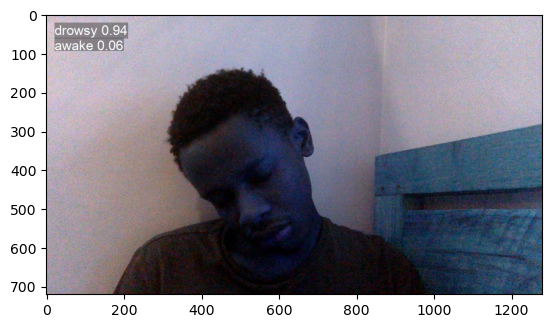

In [23]:
plt.imshow(np.squeeze(result2.plot()))

In [24]:
# real time detection
cap = cv2.VideoCapture(0, cv2.CAP_AVFOUNDATION)
while cap.isOpened():
    ret, frame = cap.read()

    # make detection
    results = model(frame)

    annotated_frame = results[0].plot()
    frame_resized = cv2.resize(annotated_frame, (960, 540))  # (width, height)
    cv2.imshow("Awake/Drowsy", frame_resized)

    if cv2.waitKey(10) & 0xFF == ord("q"):
        break
cap.release()
cv2.destroyAllWindows()


0: 224x224 drowsy 0.62, awake 0.38, 46.1ms
Speed: 61.2ms preprocess, 46.1ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)

0: 224x224 drowsy 0.80, awake 0.20, 117.7ms
Speed: 109.2ms preprocess, 117.7ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)

0: 224x224 drowsy 0.88, awake 0.12, 161.0ms
Speed: 73.3ms preprocess, 161.0ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)

0: 224x224 drowsy 0.82, awake 0.18, 104.4ms
Speed: 118.3ms preprocess, 104.4ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)

0: 224x224 drowsy 0.77, awake 0.23, 37.2ms
Speed: 32.4ms preprocess, 37.2ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)

0: 224x224 drowsy 0.69, awake 0.31, 57.0ms
Speed: 52.4ms preprocess, 57.0ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)

0: 224x224 drowsy 0.79, awake 0.21, 54.9ms
Speed: 46.3ms preprocess, 54.9ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224